### Data Analyst Assignment 1
Required Task Output:

•	You have to carry out EDA and build ML model to evaluate the insights automatically. You can use any language, model and technique of your choice.

•	Prepare a summary of your Analysis and put that into a professional looking deck

#### Loading the Requisite Libraries

In [260]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols,logit
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from xgboost import XGBRFRegressor,XGBClassifier
from sklearn.decomposition import PCA
from impyute import mice
from sklearn.naive_bayes import GaussianNB

#### Loading and Reading the Data File

In [101]:
df = pd.read_excel("Data Analyst Assignment (1).xlsx")

#### Displaying First and Last 5 Rows of the Dataset

In [102]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [103]:
df.tail()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
16829,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0.0
16833,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,Undetermined,1.40,14,1,0.0


#### Checking for Null/ Missing Values

In [104]:
df.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

#### Displaying the Number of Rows and Columns in the Dataset

In [105]:
df.shape

(16834, 16)

#### Displaying the Data Types of all the Attributes in the Dataset

In [106]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

#### Displaying the Basic Information of the Dataset

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null datetime64[ns]
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 2.1+ MB


#### Displaying the Basic Statistical Summary of the Dataset

In [108]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


#### Data Cleaning

In [109]:
df["audience_type"].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [110]:
df["creative_type"].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [111]:
df["creative_name"].value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [112]:
df.link_clicks.isnull().sum()

546

In [113]:
df.audience_type=df.audience_type.replace("'-",np.NaN) # Replacing the special character with null.
df.creative_type=df.creative_type.replace("'-",np.NaN)
df.creative_name=df.creative_name.replace("'-",np.NaN)

In [114]:
df.isnull().sum() 

Date                        0
product                     0
phase                       0
campaign_platform           0
campaign_type               0
communication_medium        0
subchannel                  0
audience_type           15101
creative_type           15101
creative_name           15101
device                      0
age                         0
spends                      0
impressions                 0
clicks                      0
link_clicks               546
dtype: int64

In [115]:
(15101/1616834)*100 
print("93.3 percent of rows are null values in the above columns, so I will be dropping them so that it does not add variance to the data if I impute them with central measures of tendency")

93.3 percent of rows are null values in the above columns, so I will be dropping them so that it does not add variance to the data if I impute them with central measures of tendency


In [116]:
df = df.dropna()

#### Exploratory Data Analysis (EDA)

Univariate Analysis:

For Numerical Columns - We create Histogram (Distplot | Seaborn)

For Categorical Columns - Barplot | Countplot

In [117]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

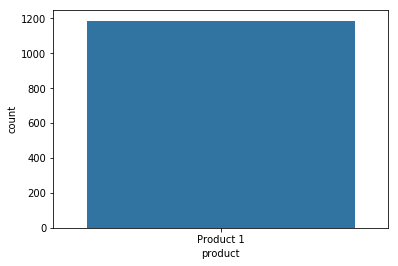

In [118]:
sns.countplot(df["product"])
plt.show()

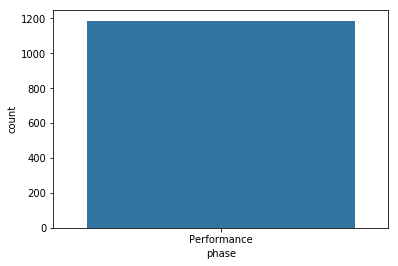

In [119]:
sns.countplot(df["phase"])
plt.show()

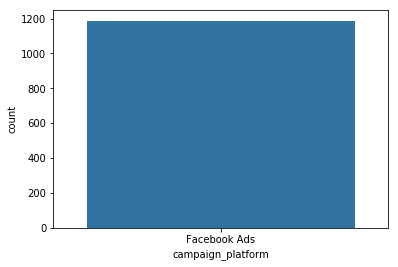

In [120]:
sns.countplot(df.campaign_platform)
plt.show()

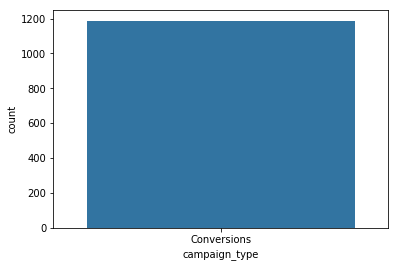

In [121]:
sns.countplot(df.campaign_type)
plt.show()

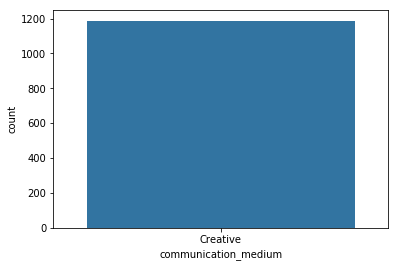

In [122]:
sns.countplot(df.communication_medium)
plt.show()

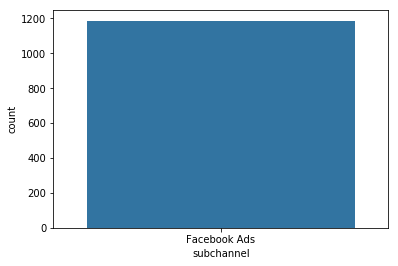

In [123]:
sns.countplot(df.subchannel)
plt.show()

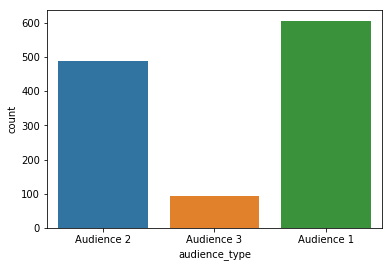

In [124]:
sns.countplot(df.audience_type)
plt.show()

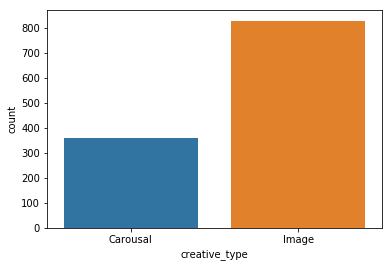

In [125]:
sns.countplot(df.creative_type)
plt.show()

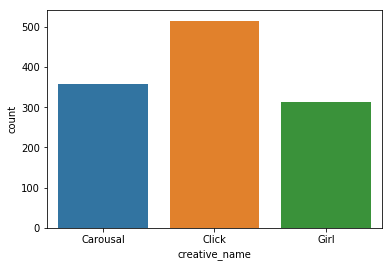

In [126]:
sns.countplot(df.creative_name)
plt.show()

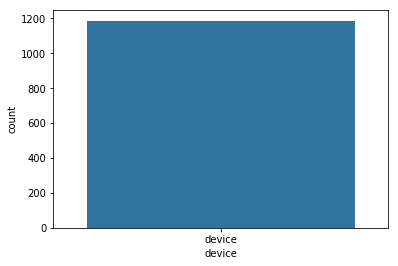

In [127]:
sns.countplot(df.device)
plt.show()

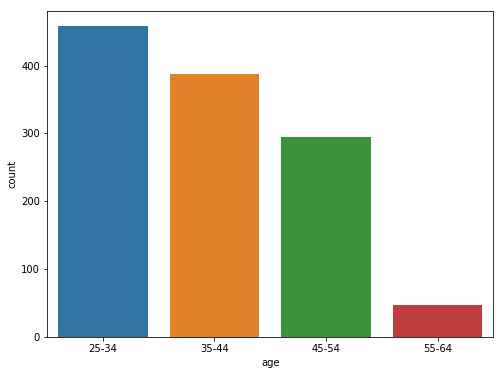

In [128]:
plt.figure(figsize=[8,6])
sns.countplot(df.age)
plt.show()

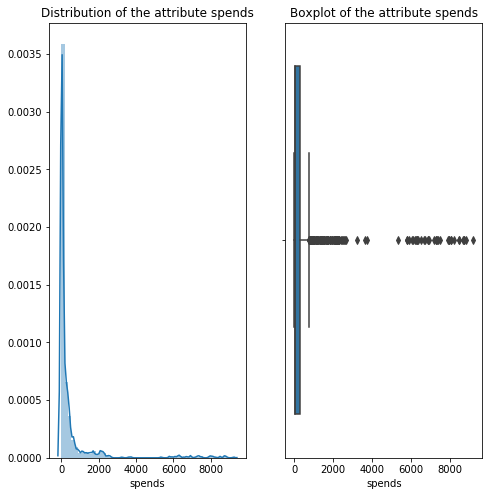

In [129]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.distplot(df.spends)
plt.title("Distribution of the attribute spends")
plt.subplot(132)
sns.boxplot(df.spends)
plt.title("Boxplot of the attribute spends")
plt.show()

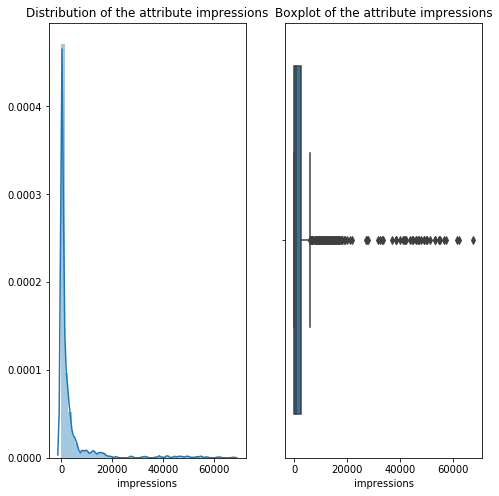

In [130]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.distplot(df.impressions)
plt.title("Distribution of the attribute impressions")
plt.subplot(132)
sns.boxplot(df.impressions)
plt.title("Boxplot of the attribute impressions")
plt.show()

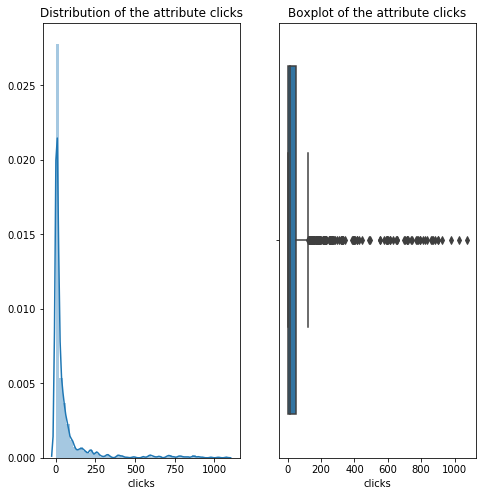

In [131]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.distplot(df.clicks)
plt.title("Distribution of the attribute clicks")
plt.subplot(132)
sns.boxplot(df.clicks)
plt.title("Boxplot of the attribute clicks")
plt.show()

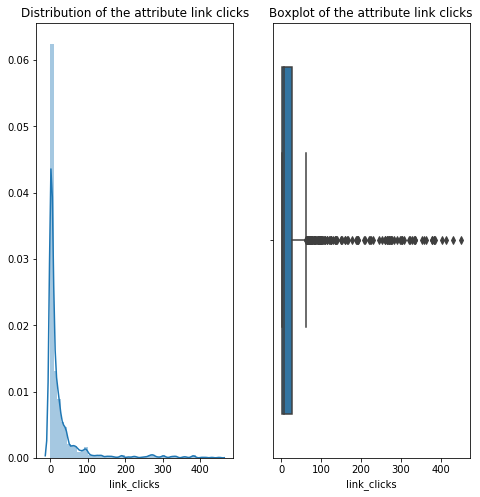

In [132]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.distplot(df.link_clicks)
plt.title("Distribution of the attribute link clicks")
plt.subplot(132)
sns.boxplot(df.link_clicks)
plt.title("Boxplot of the attribute link clicks")
plt.show()

Bivariate Analysis:
    
For Numerical vs Numerical - Scatterplot

For Categorical vs Numerical - Boxplot | Violinplot

For Categorical vs Categorical - pd.crosstab | Table | Barplot

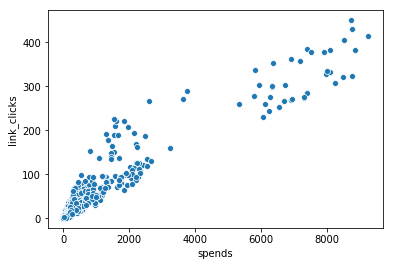

<Figure size 432x288 with 0 Axes>

In [133]:
sns.scatterplot(df.spends,df.link_clicks)
plt.show()
plt.tight_layout()

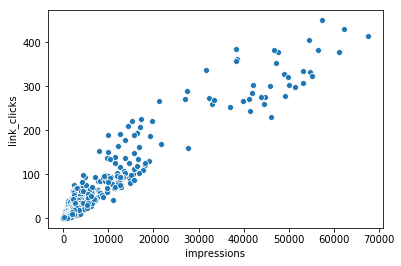

<Figure size 432x288 with 0 Axes>

In [134]:
sns.scatterplot(df.impressions,df.link_clicks)
plt.show()
plt.tight_layout()

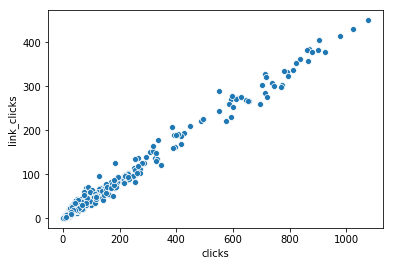

<Figure size 432x288 with 0 Axes>

In [135]:
sns.scatterplot(df.clicks,df.link_clicks)
plt.show()
plt.tight_layout()

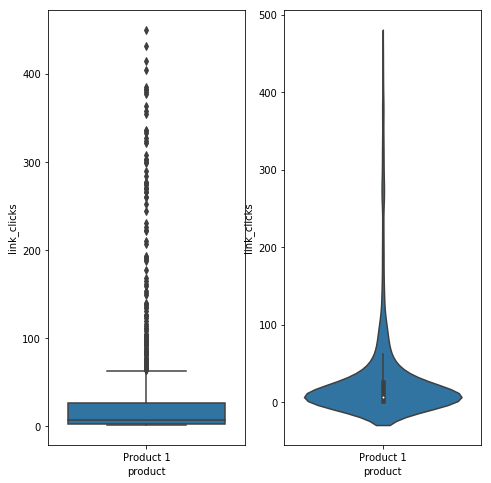

In [136]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df["product"],df.link_clicks)
plt.subplot(132)
sns.violinplot(df["product"],df.link_clicks)

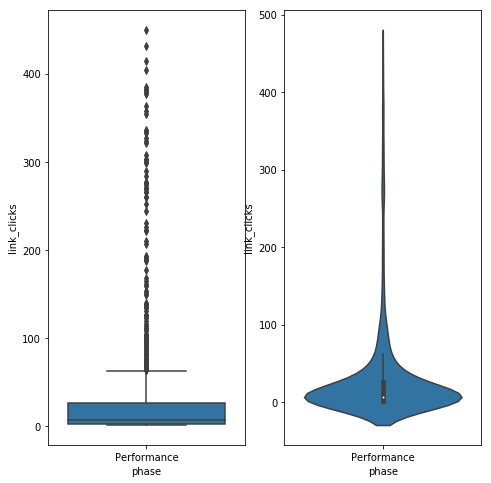

In [137]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.phase,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.phase,df.link_clicks)

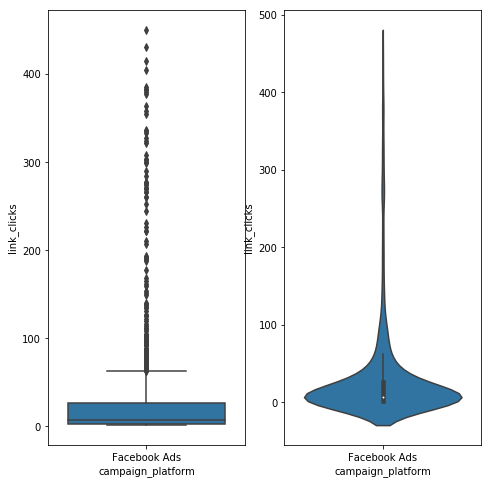

In [138]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.campaign_platform,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.campaign_platform,df.link_clicks)

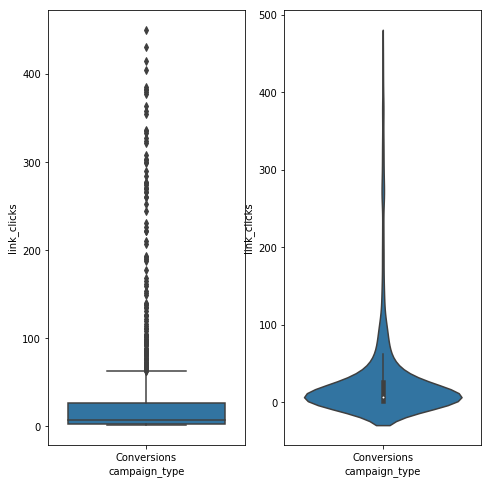

In [139]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.campaign_type,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.campaign_type,df.link_clicks)

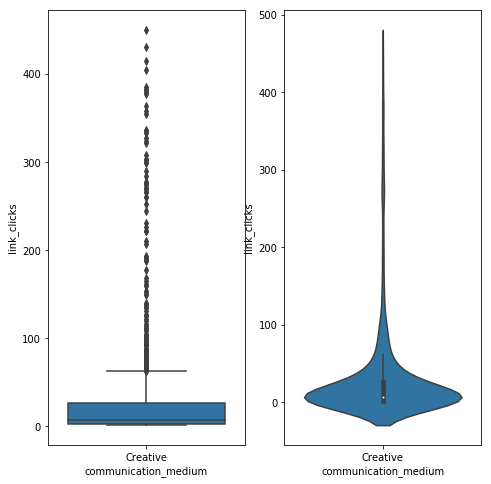

In [140]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.communication_medium,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.communication_medium,df.link_clicks)

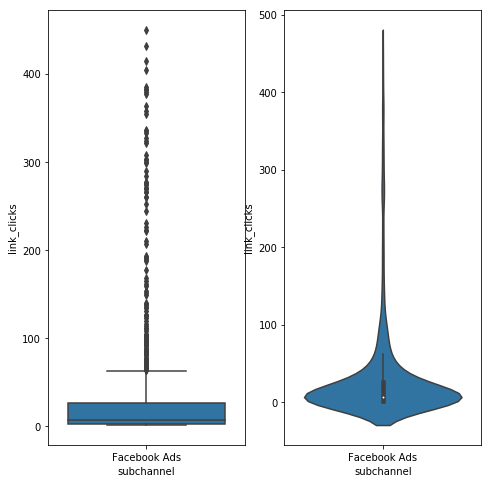

In [141]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.subchannel,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.subchannel,df.link_clicks)

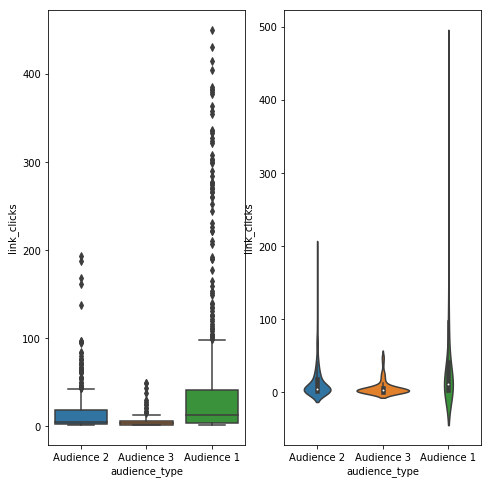

In [142]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.audience_type,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.audience_type,df.link_clicks)

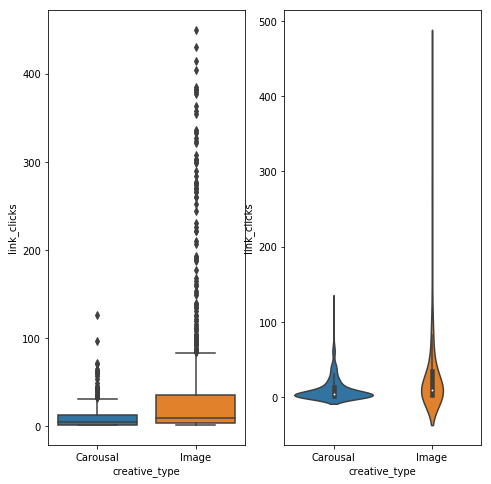

In [143]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.creative_type,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.creative_type,df.link_clicks)

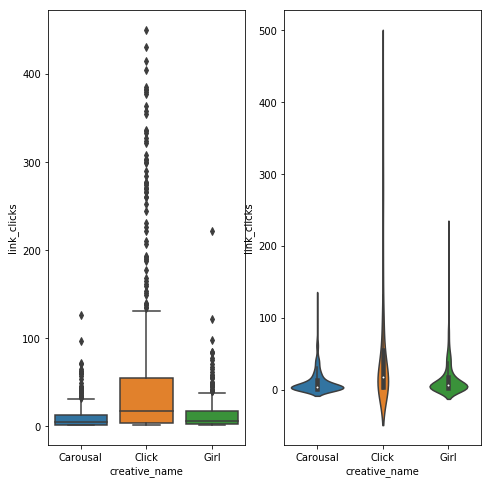

In [144]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.creative_name,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.creative_name,df.link_clicks)

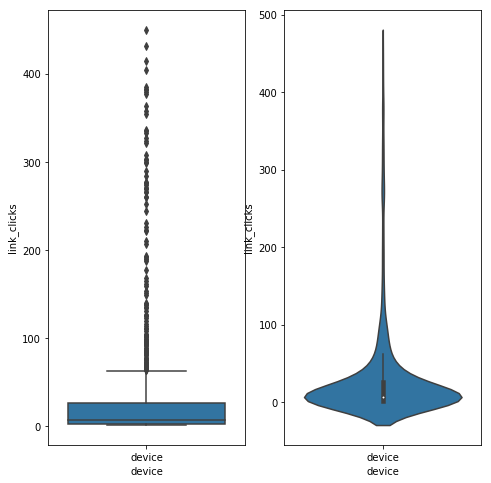

In [145]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.device,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.device,df.link_clicks)

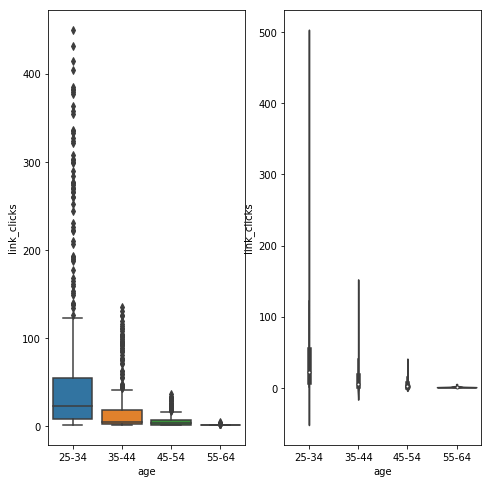

In [146]:
plt.figure(figsize=[12,8])
plt.subplot(131)
sns.boxplot(df.age,df.link_clicks)
plt.subplot(132)
sns.violinplot(df.age,df.link_clicks)

<Figure size 1440x1080 with 0 Axes>

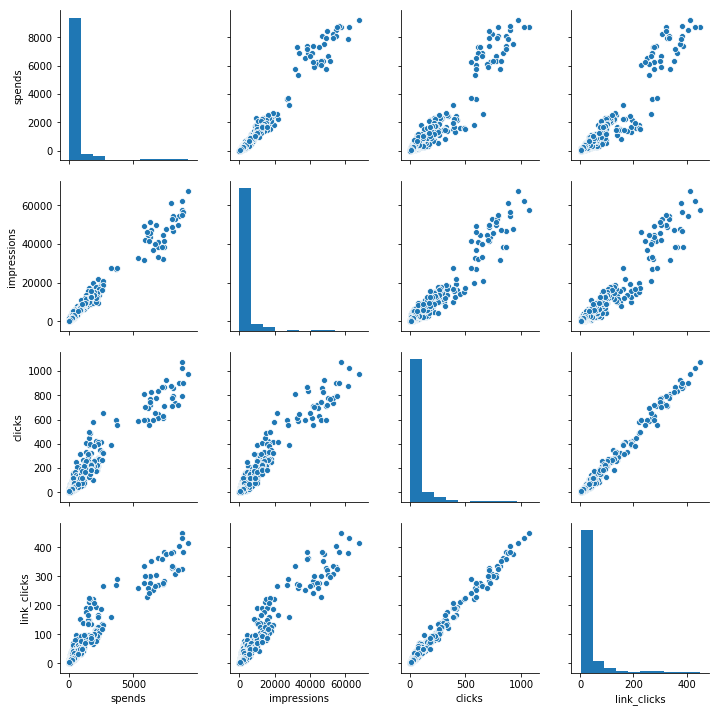

In [147]:
plt.figure(figsize=[20,15])
sns.pairplot(df)
plt.show()

In [ ]:
# The above pairplot clearly shows Linearity

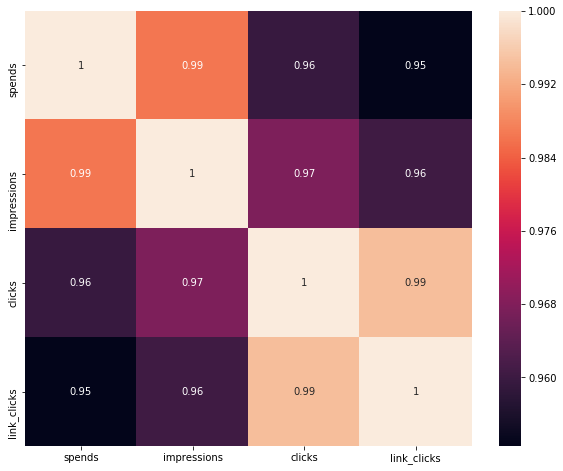

In [148]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Above Features are Highly Positively Correlated Features.

In [149]:
df.drop("Date",axis=1,inplace=True) # As Date Attribute is not valuable to predict the link clicks and make ML model

In [152]:
dummy = pd.get_dummies(df.drop(["link_clicks"],axis=1))

In [253]:
x = dummy
y = df.link_clicks
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (949, 22)
xtest shape:  (238, 22)
ytrain shape:  (949,)
ytest shape:  (238,)


#### Linear Regression Model

In [154]:
lr = LinearRegression()

In [155]:
lr_pred=lr.fit(xtrain,ytrain).predict(xtest)

In [156]:
r2_score(ytest,lr_pred)

0.9874738044357183

In [157]:
np.sqrt(mean_squared_error(ytest,lr_pred))

6.239126702960748

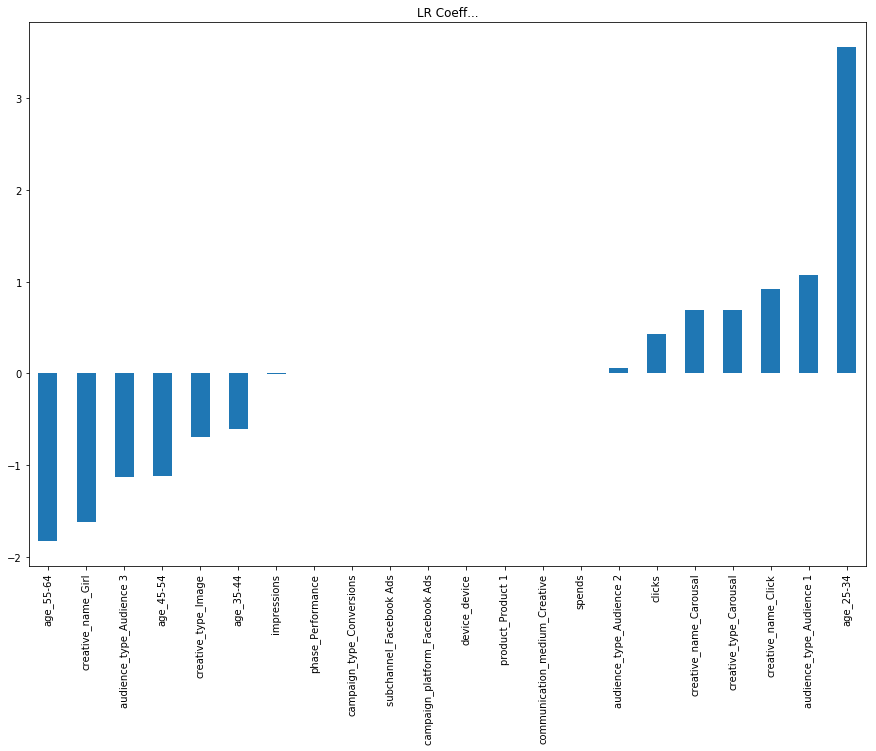

In [166]:
plt.figure(figsize=[15,10])
pd.Series(lr.coef_,x.columns).sort_values().plot(kind="bar",title="LR Coeff...")
plt.show()

#### Ridge Regression Model

In [167]:
ridge = Ridge(alpha=0.5,random_state=123)

In [173]:
ridge_pred = ridge.fit(xtrain,ytrain).predict(xtest)

In [174]:
r2_score(ytest,ridge_pred)

0.9874755749625612

In [175]:
np.sqrt(mean_squared_error(ytest,ridge_pred))

6.238685749775047

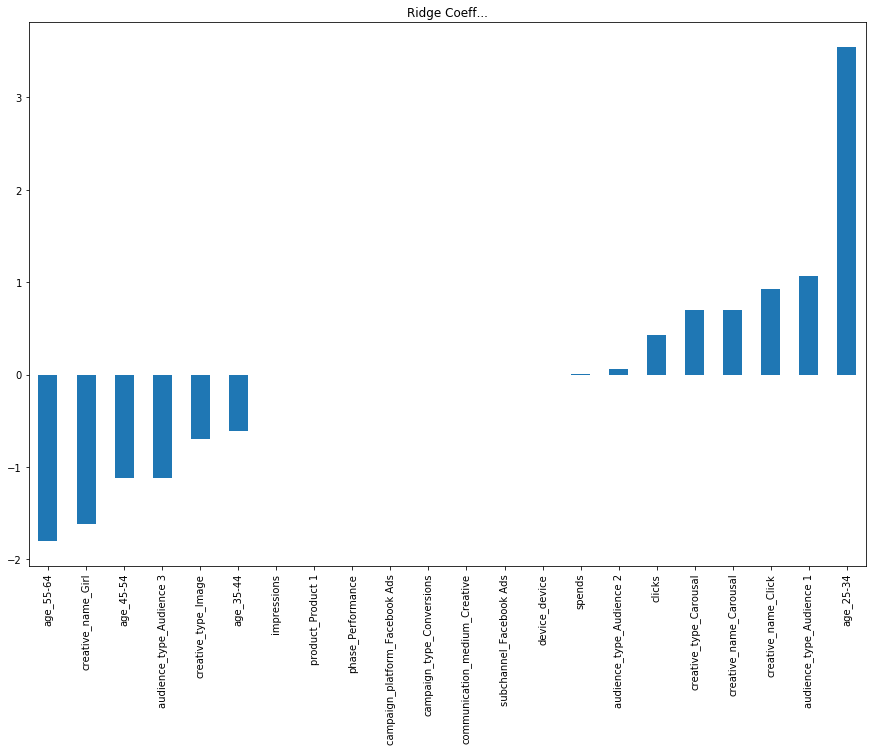

In [176]:
plt.figure(figsize=[15,10])
pd.Series(ridge.coef_,x.columns).sort_values().plot(kind="bar",title="Ridge Coeff...")
plt.show()

#### Lasso Regression Model

In [177]:
lasso = Lasso(alpha=0.05,random_state=123)

In [178]:
lasso_pred = lasso.fit(xtrain,ytrain).predict(xtest)

In [179]:
r2_score(ytest,lasso_pred)

0.9874185710866995

In [180]:
np.sqrt(mean_squared_error(ytest,lasso_pred))

6.2528670607328465

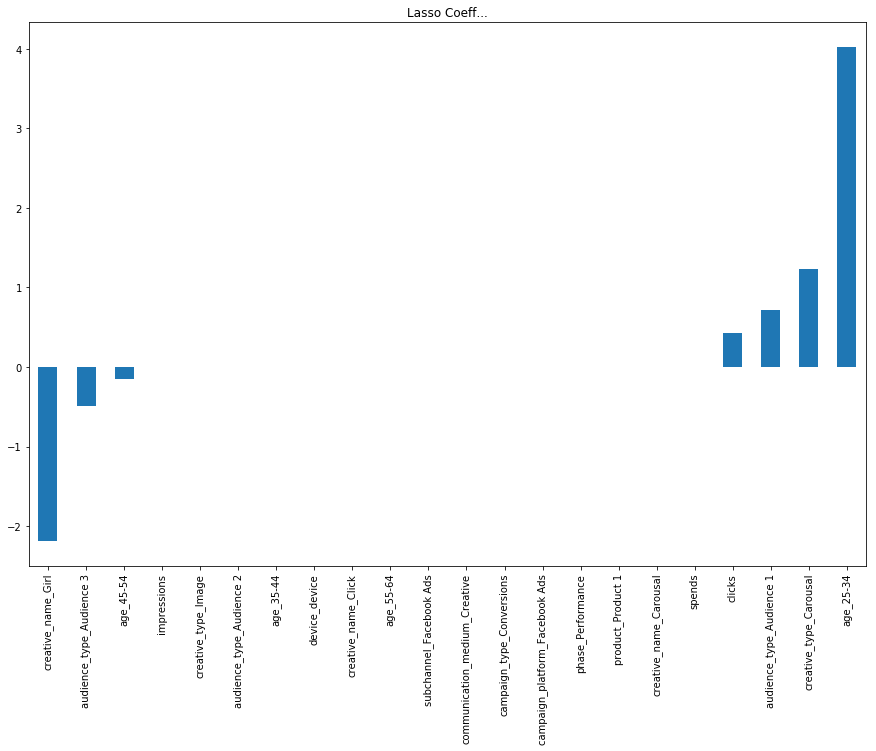

In [181]:
plt.figure(figsizae=[15,10])
pd.Series(lasso.coef_,x.columns).sort_values().plot(kind="bar",title="Lasso Coeff...")
plt.show()

#### Elastic Net Model

In [182]:
enet = ElasticNet(alpha=0.05,random_state=123)

In [183]:
enet_pred = enet.fit(xtrain,ytrain).predict(xtest)

In [184]:
r2_score(ytest,enet_pred)

0.987515600207985

In [185]:
np.sqrt(mean_squared_error(ytest,enet_pred))

6.228709054352977

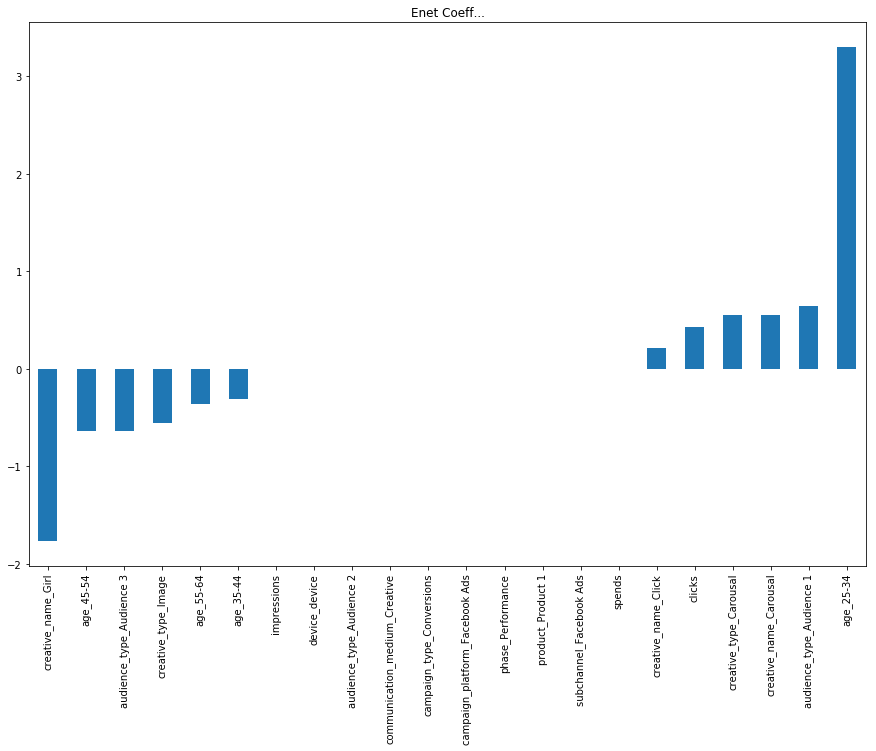

In [187]:
plt.figure(figsize=[15,10])
pd.Series(enet.coef_,x.columns).sort_values().plot(kind="bar",title="Enet Coeff...")
plt.show()

#### Random Forest Regressor

In [158]:
rf = RandomForestRegressor(random_state=0)

In [159]:
rf_pred = rf.fit(xtrain,ytrain).predict(xtest)

In [160]:
r2_score(ytest,rf_pred)

0.9791053774406965

In [161]:
np.sqrt(mean_squared_error(ytest,rf_pred))

8.05807817966417

#### Decision Tree Regressor

In [162]:
dt = DecisionTreeRegressor(random_state=0)

In [163]:
dt_pred = dt.fit(xtrain,ytrain).predict(xtest)

In [164]:
r2_score(ytest,dt_pred)

0.9489125710491129

In [165]:
np.sqrt(mean_squared_error(ytest,dt_pred))

12.600020007987316

#### Gradient Boosting Regression Model

In [170]:
gbr = GradientBoostingRegressor(random_state=0)

In [172]:
gbr_pred = gbr.fit(xtrain,ytrain).predict(xtest)

In [188]:
r2_score(ytest,gbr_pred)

0.9810196302963113

In [189]:
np.sqrt(mean_squared_error(ytest,gbr_pred))

7.6800941684875506

#### Naive Bayes Model

In [192]:
NB = GaussianNB()

In [193]:
predict_NB = NB.fit(xtrain,ytrain).predict(xtest)

In [194]:
r2_score(ytest,predict_NB)

0.8832215872458098

In [195]:
np.sqrt(mean_squared_error(ytest,predict_NB))

19.05002260745477

#### Bagging Regressor Model

In [256]:
BR = BaggingRegressor(random_state=123)

In [257]:
BR_Pred = BR.fit(xtrain,ytrain).predict(xtest)

In [258]:
r2_score(ytest,BR_Pred)

0.9829417607752429

In [259]:
np.sqrt(mean_squared_error(ytest,BR_Pred))

7.280837055949961

#### XGBoost Regressor

In [261]:
xgb = XGBRFRegressor(random_state=123)

In [264]:
xgb_Pred = xgb.fit(xtrain,ytrain).predict(xtest)

[02:26:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [265]:
r2_score(ytest,xgb_Pred)

0.9451488367423023

In [266]:
np.sqrt(mean_squared_error(ytest,xgb_Pred))

13.055909546128868

#### Standard Scaler

In [196]:
ss = StandardScaler()

In [197]:
xtrain_scaled=ss.fit_transform(xtrain)

In [198]:
xtest_scaled = ss.transform(xtest)

#### Scaled Machine Learning Models

In [199]:
lr_scaled_predict = LinearRegression().fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [200]:
r2_score(ytest,lr_scaled_predict)

0.9874738044357184

In [201]:
np.sqrt(mean_squared_error(ytest,lr_scaled_predict))

6.239126702960742

In [202]:
### It has no change in terms of variance and accuracy even if we scale the data.

#### Principal Component Analysis (PCA)

In [205]:
copy_df = df.copy()

In [207]:
copy_df.drop(["link_clicks"],axis=1,inplace=True)

In [208]:
dummy_new = pd.get_dummies(copy_df)

In [209]:
SS = StandardScaler()

In [210]:
scaled_copy_df = SS.fit_transform(dummy_new)

In [219]:
pca = PCA(n_components=7)

In [220]:
pca_x = pca.fit_transform(scaled_copy_df)

In [221]:
pca.explained_variance_

array([4.0393651 , 2.99605807, 1.92115923, 1.57844734, 1.43589901,
       1.16400568, 1.12537883])

In [222]:
print(np.round(pca.explained_variance_ratio_,4))

[0.2691 0.1996 0.128  0.1051 0.0956 0.0775 0.075 ]


In [223]:
pca_evr_df = pd.DataFrame({"EVR in %":np.round(pca.explained_variance_ratio_,4)*100})
pca_evr_df.sort_values(by="EVR in %",ascending=False)

,EVR in %
0,26.91
1,19.96
2,12.80
3,10.51
4,9.56
5,7.75
6,7.50


In [225]:
xtrain,xtest,ytrain,ytest = train_test_split(pca_x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (949, 7)
xtest shape:  (238, 7)
ytrain shape:  (949,)
ytest shape:  (238,)


In [226]:
lr_pca = LinearRegression()
predict_lr_pca = lr_pca.fit(xtrain,ytrain).predict(xtest)

#### Feature Selection/Importance

In [238]:
rf_fi = pd.DataFrame({"Columns":x.columns,"Feature_Importance_RF":(rf.feature_importances_)*100})

In [242]:
rf_fi

,Columns,Feature_Importance_RF
0,spends,1.141000
1,impressions,0.849487
2,clicks,97.778350
3,product_Product 1,0.000000
4,phase_Performance,0.000000
5,campaign_platform_Facebook Ads,0.000000
6,campaign_type_Conversions,0.000000
7,communication_medium_Creative,0.000000
8,subchannel_Facebook Ads,0.000000
9,audience_type_Audience 1,0.021927


In [ ]:
The attribute Clicks has the feature importance of 97.77% out of all the other attributes and this is why the models are overfitting.

In [294]:
X = pd.DataFrame(df.clicks)
y = df.link_clicks
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (949, 1)
xtest shape:  (238, 1)
ytrain shape:  (949,)
ytest shape:  (238,)


In [295]:
rf_fi_predict = RandomForestRegressor(random_state=123).fit(xtrain,ytrain).predict(xtest)

In [296]:
r2_score(ytest,rf_fi_predict)

0.9788978853285989

In [297]:
np.sqrt(mean_squared_error(ytest,rf_fi_predict))

8.097989340048363

#### Statistical Model - Ordinary Least Squares Model

Feature Selection in OLS Model by eliminating attributes based on the P-Value. Will drop the features which have a pvalue greater than 0.05

In [267]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            link_clicks   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:36:17   Log-Likelihood:                -3857.2
No. Observations:                1187   AIC:                             7736.
Df Residuals:                    1176   BIC:                             7792.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
spends                             0.0008      0.001      0.885      0.376      -0.001       0.002
impressions                       -0.0003      0.000     -2.194      0.028      -0.001   -3.37e-05
clicks                             0.4305      0.005     81.145      0.000       0.420       0.441
product_Product 1                  0.1434      0.041      3.511      0.000       0.063       0.224
phase_Performance                  0.1434      0.041      3.511      0.000       0.063       0.224
campaign_platform_Facebook Ads     0.1434      0.041      3.511      0.000       0.063       0.224
campaign_type_Conversions          0.1434      0.041      3.511      0.000       0.063       0.224
communication_medium_Creative      0.1434      0.041      3.511      0.000       0.063       0.224
subchannel_Facebook Ads            0.1434      0.041      3.511      0.000       0.063       0.224
audience_type_Audience 1           1.3041      0.307      4.251      0.000       0.702       1.906
audience_type_Audience 2           0.1005      0.300      0.335      0.738      -0.488       0.688
audience_type_Audience 3          -1.2612      0.467     -2.703      0.007      -2.177      -0.346
creative_type_Carousal             0.7763      0.128      6.083      0.000       0.526       1.027
creative_type_Image               -0.6330      0.120     -5.278      0.000      -0.868      -0.398
creative_name_Carousal             0.7763      0.128      6.083      0.000       0.526       1.027
creative_name_Click                0.8653      0.248      3.490      0.001       0.379       1.352
creative_name_Girl                -1.4983      0.252     -5.947      0.000      -1.993      -1.004
device_device                      0.1434      0.041      3.511      0.000       0.063       0.224
age_25-34                          3.3056      0.388      8.518      0.000       2.544       4.067
age_35-44                         -0.4541      0.351     -1.293      0.196      -1.143       0.235
age_45-54                         -0.9691      0.373     -2.595      0.010      -1.702      -0.236
age_55-64                         -1.7391      0.739     -2.354      0.019      -3.188      -0.290
==============================================================================
Omnibus:                      407.641   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8695.317
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                      16.090   Cond. No.                     5.31e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

In [289]:
model = sm.OLS(y,x.drop(["spends","audience_type_Audience 2","audience_type_Audience 3","age_35-44","product_Product 1","phase_Performance","campaign_platform_Facebook Ads","campaign_type_Conversions","communication_medium_Creative","subchannel_Facebook Ads","device_device","creative_type_Image","creative_name_Click","age_45-54","age_55-64"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            link_clicks   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.415e+04
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:44:41   Log-Likelihood:                -3860.8
No. Observations:                1187   AIC:                             7734.
Df Residuals:                    1181   BIC:                             7764.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
impressions                 -0.0002   8.47e-05     -2.823      0.005      -0.000   -7.29e-05
clicks                       0.4333      0.005     84.960      0.000       0.423       0.443
audience_type_Audience 1     1.4461      0.352      4.108      0.000       0.755       2.137
creative_type_Carousal       0.8739      0.211      4.148      0.000       0.461       1.287
creative_name_Carousal       0.8739      0.211      4.148      0.000       0.461       1.287
creative_name_Girl          -2.1000      0.426     -4.930      0.000      -2.936      -1.264
age_25-34                    3.9998      0.404      9.907      0.000       3.208       4.792
==============================================================================
Omnibus:                      381.470   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8312.421
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                      15.825   Cond. No.                     8.93e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After feature selection based on P-value, R-Square and Adjusted R-Square increased by 0.02% to 99.2%.

#### Hyper Parameter Tuning

In [299]:
X = dummy
y = df.link_clicks
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (949, 22)
xtest shape:  (238, 22)
ytrain shape:  (949,)
ytest shape:  (238,)


In [300]:
rf = RandomForestRegressor(random_state=123)

In [303]:
params = {"min_samples_split": np.linspace(0.1,0.5,1,6),"min_samples_leaf": np.linspace(0.1,0.5,1,6),
          "max_features":["log2","sqrt"],'max_depth': [2,3,4,5,6,9],"random_state":[0,123,42]}
Grid_RF = GridSearchCV(rf,cv=10,param_grid=params)
Grid_RF.fit(xtrain,ytrain)
print('Best Parameters using grid search:', Grid_RF.best_params_)

Best Parameters using grid search: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'random_state': 123}


In [304]:
rf_grid = RandomForestRegressor(random_state=123,max_depth= 4,max_features='log2',min_samples_leaf=0.1,min_samples_split= 0.1)
predict_rf_grid = rf_grid.fit(xtrain,ytrain).predict(xtest)

In [305]:
r2_score(ytest,predict_rf_grid)

0.5657316129626524

In [306]:
np.sqrt(mean_squared_error(ytest,predict_rf_grid))

36.73612289155279

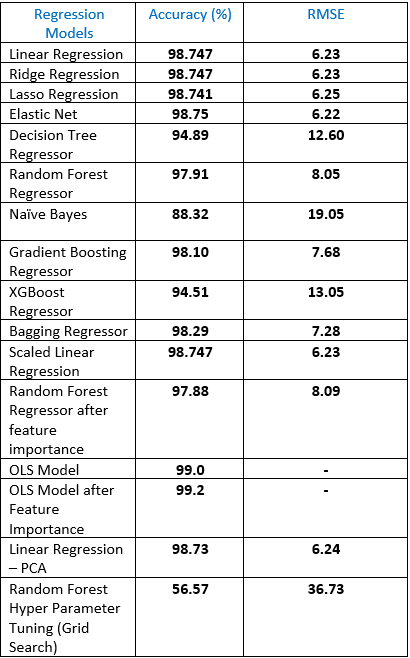